In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
import arch as arch

%matplotlib inline

In [2]:
file_path = Path('PrivateEquityReturnsFinal.csv')
pe_df = pd.read_csv(file_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
pe_df

,Index,Quarter,Private Equity Returns,Cumulative,100,Unnamed: 6,Unnamed: 7
Date,,,,,,,
1986-06-30,1986 Q2,Q2,4.22,104.22,104.22,NaN,NaN
1986-09-30,1986 Q3,Q3,-2.60,101.62,101.62,NaN,NaN
1986-12-31,1986 Q4,Q4,1.11,102.73,102.73,NaN,NaN
1987-03-31,1987 Q1,Q1,3.73,106.46,106.46,NaN,NaN
1987-06-30,1987 Q2,Q2,1.28,107.74,107.74,NaN,NaN
...,...,...,...,...,...,...,...
2018-09-30,2018 Q3,Q3,3.84,532.50,532.50,NaN,NaN
2018-12-31,2018 Q4,Q4,-1.95,530.55,530.55,NaN,NaN
2019-03-31,2019 Q1,Q1,4.89,535.44,535.44,NaN,NaN


In [3]:
df = pd.DataFrame(pe_df['Private Equity Returns'])
df

,Private Equity Returns
Date,
1986-06-30,4.22
1986-09-30,-2.60
1986-12-31,1.11
1987-03-31,3.73
1987-06-30,1.28
...,...
2018-09-30,3.84
2018-12-31,-1.95
2019-03-31,4.89


In [4]:
file_path_2 = Path('SPXReturns.csv')
eq_df = pd.read_csv(file_path_2, parse_dates=True, index_col='Date', infer_datetime_format=True)
eq_df

,SPX_Return,Gold_Return,10_Year_Return,NDX_Return
Date,,,,
1986-06-30,4.997907,-4.392760,1.754386,2.843636
1986-09-30,-7.781850,2.702703,-0.967940,31.560710
1986-12-31,4.690472,8.181818,-5.894930,1.720060
1987-03-31,20.452570,0.110571,-7.530020,8.592264
1987-06-30,4.216661,7.996466,5.159705,-23.965900
...,...,...,...,...
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN


In [5]:
eq_df.dropna()

,SPX_Return,Gold_Return,10_Year_Return,NDX_Return
Date,,,,
1986-06-30,4.997907,-4.392760,1.754386,2.843636
1986-09-30,-7.781850,2.702703,-0.967940,31.560710
1986-12-31,4.690472,8.181818,-5.894930,1.720060
1987-03-31,20.452570,0.110571,-7.530020,8.592264
1987-06-30,4.216661,7.996466,5.159705,-23.965900
...,...,...,...,...
2018-09-30,7.195856,0.913135,1.805609,16.568930
2018-12-31,-13.971600,9.334880,3.018868,3.961419
2019-03-31,13.066200,3.678291,1.831502,1.021682


In [6]:
returns_df = pd.concat([df, eq_df], axis=1, join='inner')
returns_df

,Private Equity Returns,SPX_Return,Gold_Return,10_Year_Return,NDX_Return
Date,,,,,
1986-06-30,4.22,4.997907,-4.392760,1.754386,2.843636
1986-09-30,-2.60,-7.781850,2.702703,-0.967940,31.560710
1986-12-31,1.11,4.690472,8.181818,-5.894930,1.720060
1987-03-31,3.73,20.452570,0.110571,-7.530020,8.592264
1987-06-30,1.28,4.216661,7.996466,5.159705,-23.965900
...,...,...,...,...,...
2018-09-30,3.84,7.195856,0.913135,1.805609,16.568930
2018-12-31,-1.95,-13.971600,9.334880,3.018868,3.961419
2019-03-31,4.89,13.066200,3.678291,1.831502,1.021682


In [7]:
#Calculating the Funds STD
rolling_std = returns_df.rolling(window=4).std()
rolling_std

,Private Equity Returns,SPX_Return,Gold_Return,10_Year_Return,NDX_Return
Date,,,,,
1986-06-30,NaN,NaN,NaN,NaN,NaN
1986-09-30,NaN,NaN,NaN,NaN,NaN
1986-12-31,NaN,NaN,NaN,NaN,NaN
1987-03-31,3.124127,11.559442,5.249051,4.302450,13.917078
1987-06-30,2.610607,11.579359,4.001359,5.706661,22.855065
...,...,...,...,...,...
2018-09-30,1.220174,3.782149,6.021138,1.915670,14.455733
2018-12-31,3.155887,9.141159,6.564380,1.913946,14.306324
2019-03-31,3.385827,11.619639,3.792114,0.619564,13.851040


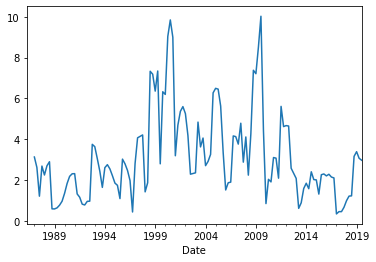

In [8]:
#Plotting Fund Returns STD 
rolling_std['Private Equity Returns'].plot()

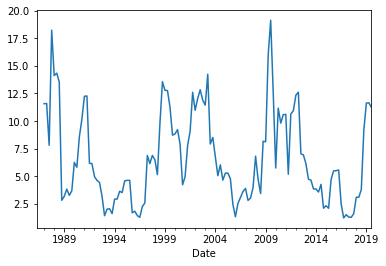

In [9]:
#Plotting Market STD 
rolling_std['SPX_Return'].plot()

In [10]:
#Calculating Covariance 
rolling_covariance = returns_df['Private Equity Returns'].rolling(window=4).cov(returns_df['SPX_Return'])
rolling_covariance

Date
1986-06-30          NaN
1986-09-30          NaN
1986-12-31          NaN
1987-03-31    28.902848
1987-06-30    29.378712
                ...    
2018-09-30     2.426803
2018-12-31    26.647777
2019-03-31    35.502737
2019-06-30    35.341702
2019-09-30    32.614389
Freq: Q-DEC, Length: 134, dtype: float64

In [11]:
#Calculate Rolling Variance 
rolling_variance_spx = returns_df['SPX_Return'].rolling(window=4).var()
rolling_variance_spx

Date
1986-06-30           NaN
1986-09-30           NaN
1986-12-31           NaN
1987-03-31    133.620695
1987-06-30    134.081544
                 ...    
2018-09-30     14.304650
2018-12-31     83.560788
2019-03-31    135.016015
2019-06-30    135.555341
2019-09-30    125.849339
Freq: Q-DEC, Name: SPX_Return, Length: 134, dtype: float64

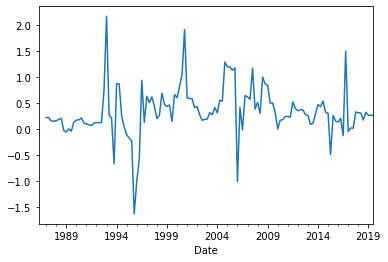

In [12]:
#Calculate the rolling 1 year beta of the Fund
rolling_beta = rolling_covariance / rolling_variance_spx
rolling_beta.plot()

In [13]:
#Calculating Sharpes 
sharpe_ratio = (returns_df['Private Equity Returns'].mean()*4)/(returns_df['Private Equity Returns'].std()*np.sqrt(4))
sharpe_ratio

1.4667395767226639

In [14]:
#Calculate Sharpe Ratios for entire group
sharpe_ratios = (returns_df.mean()*4)/(returns_df.std()*np.sqrt(4))
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios

10_Year_Return            0.169151
Gold_Return               0.369753
SPX_Return                0.567143
NDX_Return                0.597420
Private Equity Returns    1.466740
dtype: float64

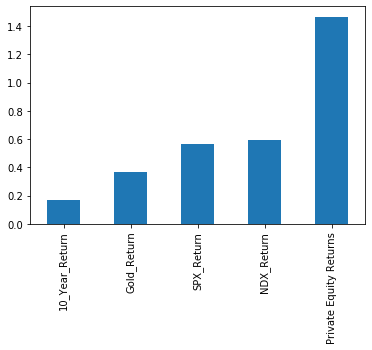

In [15]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

In [16]:
#Start of the Monte Carlo Analysis 
avg_qtr_return_pe = returns_df.mean()['Private Equity Returns']
avg_qtr_return_spx = returns_df.mean()['SPX_Return']
avg_qtr_return_spx

2.2091162611940307

In [17]:
#Calculating the Std for Private Equity Returns and S&P 
std_dev_qtr_return_pe = returns_df.std()['Private Equity Returns']
std_dev_qtr_return_spx = returns_df.std()['SPX_Return']
std_dev_qtr_return_spx

7.790332164529446

In [18]:
# Save the last day's closing price
pe_last_price = returns_df['Private Equity Returns'][-1]
spx_last_price = returns_df['SPX_Return'][-1]

In [19]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 4 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [20]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    
    # Initialize last Prices
    simulated_pe_prices = [pe_last_price]
    simulated_spx_prices = [spx_last_price]
    
    # Simulate the returns for last 5 years
    for i in range(number_records):
        
        # Calculate the simulated SPY and AGG prices 
        simulated_pe_price = simulated_pe_prices[-1] * (1 + np.random.normal(avg_qtr_return_pe, std_dev_qtr_return_pe))
        simulated_spx_price = simulated_spx_prices[-1] * (1 + np.random.normal(avg_qtr_return_spx, std_dev_qtr_return_spx))
        
        # Append the simulated price to the list
        simulated_pe_prices.append(simulated_pe_price)
        simulated_spx_prices.append(simulated_spx_price)
        
    # Append a simulated prices of each simulation to DataFrame
    monte_carlo["PE prices"] = pd.Series(simulated_pe_prices)
    monte_carlo["SPX prices"] = pd.Series(simulated_spx_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_qtr_returns = monte_carlo.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [1,0]
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_qtr_returns = simulated_qtr_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_qtr_returns.fillna(0)).cumprod()
    
# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,9.435822,2.040022,3.729831,1.301366,-1.160123,6.621553,4.513561,3.647771,5.010667,0.873440,...,5.106965,8.108078,2.635914,0.491748,3.030628,4.531906,8.567190,6.565787,3.849114,4.840131
2,68.457903,27.573291,-18.173182,3.504157,-5.686536,38.058045,32.583721,34.880788,23.479237,-3.879504,...,8.185974,93.913098,4.798027,3.104252,11.993233,9.894098,20.499707,-45.665752,25.375437,21.786585
3,472.650208,313.281326,-9.824722,17.269471,-19.309751,441.096363,-36.813247,419.738001,-3.142623,-56.411368,...,44.326440,628.311314,-29.562832,27.410178,-15.141584,42.029503,123.179495,-16.395129,6.468744,-143.961211
4,3219.390857,2780.591381,-25.779661,138.337181,-1.937907,315.770872,-91.130964,85.885305,-14.359786,-239.541039,...,404.558448,-1585.695380,-223.820552,249.334503,-44.069301,316.336585,276.774156,-65.080426,87.636029,-30.162293


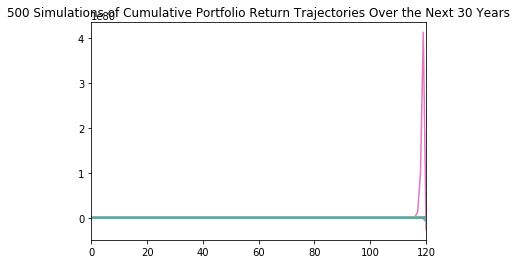

In [21]:
# Visualize the Simulation
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [23]:
#pd.DataFrame(scaled_returns).hist()

In [ ]:
#pe_df.pe_returns.hist()

In [ ]:
#pe_df = pe_df.dropna()
#pe_df

In [ ]:
#pe_2_df = pe_df.set_index(['Date'])
#pe_2_df

In [ ]:
#pe_final = pe_df['Private Equity Returns'].copy()
#pe_final#

In [ ]:
#pe_final = pd.DataFrame(columns=['Date','Private Equity Returns'])
#pe_final

In [ ]:
#pe_final = pe_final.drop([134])
#pe_final

In [ ]:
#pe_final = pe_final.set_index('Date')
#pe_final

In [ ]:
#pe_df['Private Equity Returns'].plot()

In [ ]:
#pe_df['Cumulative'].plot()

In [ ]:
#pe_df = df.asfreq('Q-DEC')

In [ ]:
#pd.infer_freq(pe_df.index)

In [ ]:
#from arch import arch_model

In [ ]:
# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.
model = arch_model(pe_df.pe_returns, mean="Zero", vol="Garch", p=3, q=3)

In [ ]:
# Fit the GARCH Model
#res = model.fit()

In [ ]:
#import statsmodels.api as sm

In [ ]:
#ts_noise, ts_trend = sm.tsa.filters.hpfilter(pe_df.pe_returns)

In [ ]:
#ts_noise.plot()

In [ ]:
#ts_trend.plot()

In [ ]:
#fit.

In [ ]:
#pe_df.pe_returns.plot()

In [ ]:
# Summarize the model results
#res.summary()

In [ ]:
# Plot the model estimate of annualized volatility
#fig = res.plot()

In [ ]:
# Construct Volatility Forecasts for the next 3 days
#forecast_horizon = 3
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
#forecasts = res.forecast(start='2019-06-30', horizon=forecast_horizon)
#forecasts.mean

In [ ]:
#pe_df.tail()

In [ ]:
#pe_df.tail()

In [ ]:
#forecasts = res.forecast(start='2019-12-01', horizon=3)

In [ ]:
#forecasts.variance

In [ ]:
# Annualize the forecast
#intermediate = np.sqrt(forecasts.variance.dropna() * 12)
#intermediate

In [ ]:
# The name of the column here is the date of the forecast.
# Each row represents the forecast of volatility for the following days.
# Transposing makes the forecast easier to plot
#final = intermediate.dropna().T
#final

In [ ]:
#final.plot()